In [110]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pickle

from sklearn.metrics import accuracy_score
from keras.models import model_from_json

tf.logging.set_verbosity(tf.logging.ERROR)


Using TensorFlow backend.


In [11]:
print(tf.__version__)

1.10.0


In [12]:
def loadBeer():
    recipes_raw = pd.read_csv('./data/recipeData.csv',index_col='BeerID',encoding='latin1')
    recipes_train = recipes_raw[["OG","FG","ABV","IBU","Color"]]
    recipes_label = recipes_raw[["Style"]]
    recipes_label=recipes_label["Style"].fillna("N/A")
    X_train, X_test, y_train, y_test  = train_test_split(recipes_train, recipes_label, test_size=0.3, random_state=0)
    encoder = LabelEncoder()
    y_test = encoder.fit_transform(y_test).astype(np.int32)
    y_train = encoder.fit_transform(y_train).astype(np.int32)
    num_features = X_train.shape[1]
    num_classes = len(encoder.classes_)
    return  X_train, X_test, y_train, y_test,num_classes,num_features

In [124]:
X_train, X_test, y_train, y_test,num_classes,num_features = loadBeer()
recipes_raw = pd.read_csv('./data/recipeData.csv',index_col='BeerID',encoding='latin1')
recipes_train = recipes_raw[["OG","FG","ABV","IBU","Color"]]
recipes_label = recipes_raw[["Style"]]
recipes_label=recipes_label["Style"].fillna("N/A")
recipes_raw.head()

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
BeerID,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


array(['Cream Ale', 'Holiday/Winter Special Spiced Beer', 'American IPA',
       'Belgian Blond Ale', 'American Pale Ale', 'Imperial IPA',
       'Robust Porter', 'Bohemian Pilsener', 'Saison',
       'Northern English Brown', 'English IPA', 'Traditional Bock',
       'Premium American Lager', 'Belgian Golden Strong Ale', 'N/A',
       'Double IPA', 'Blonde Ale', 'Light American Lager',
       'German Pilsner (Pils)', 'American Brown Ale', 'Oatmeal Stout',
       'Specialty Beer', 'American Amber Ale', 'Kölsch', 'Witbier',
       'Weizen/Weissbier', 'Trappist Single', 'Russian Imperial Stout',
       'Specialty IPA: Black IPA', 'Sweet Stout', 'Strong Scotch Ale',
       'Belgian Tripel', 'American Stout', 'Belgian Pale Ale',
       'Dark American Lager', 'Dry Stout', 'Belgian Dark Strong Ale',
       'American Wheat or Rye Beer', 'Vienna Lager',
       'Special/Best/Premium Bitter', 'Experimental Beer',
       'Irish Red Ale', 'Old Ale', 'Extra Special/Strong Bitter (ESB)',
       'Win

In [58]:
model = keras.Sequential([
    keras.layers.InputLayer((num_features,)),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])


In [59]:
model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
51702/51702 [==============================] - 95s 2ms/step - loss: 4.0231 - acc: 0.1653
Epoch 2/10
51702/51702 [==============================] - 95s 2ms/step - loss: 3.6797 - acc: 0.1898
Epoch 3/10
51702/51702 [==============================] - 95s 2ms/step - loss: 3.5446 - acc: 0.2066
Epoch 4/10
51702/51702 [==============================] - 95s 2ms/step - loss: 3.4599 - acc: 0.2148
Epoch 5/10
51702/51702 [==============================] - 99s 2ms/step - loss: 3.4060 - acc: 0.2218
Epoch 6/10
51702/51702 [==============================] - 99s 2ms/step - loss: 3.3633 - acc: 0.2237
Epoch 7/10
51702/51702 [==============================] - 99s 2ms/step - loss: 3.3312 - acc: 0.2304
Epoch 8/10
51702/51702 [==============================] - 98s 2ms/step - loss: 3.3057 - acc: 0.2318
Epoch 9/10
51702/51702 [==============================] - 96s 2ms/step - loss: 3.2877 - acc: 0.2322
Epoch 10/10
51702/51702 [==============================] - 96s 2ms/step - loss: 3.2624 - acc: 0.2368

Text(0.5,0,'epoch')

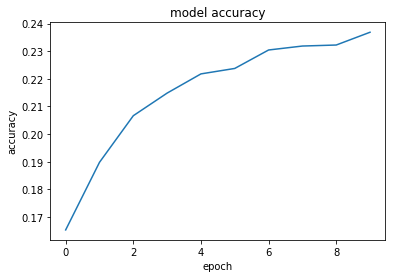

In [61]:
# summarize history for accuracy
pyplot.plot(history.history['acc'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')

In [100]:
model2 = keras.Sequential([
    keras.layers.InputLayer((num_features,)),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])
model2.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
epochs=250
val_auc_double_train, val_auc_double_test = np.zeros(epochs), np.zeros(epochs)
for i in range(epochs):
    model2.fit(X_train, y_train)
    pred = model2.predict_classes(X_test)
    val_auc_double_test[i] = accuracy_score(y_test,pred)
    pred = model2.predict_classes(X_train)
    val_auc_double_train[i] = accuracy_score(y_train,pred)

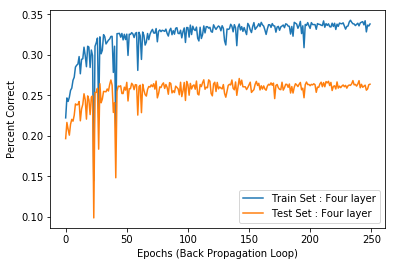

In [101]:
pyplot.plot(val_auc_double_train, label="Train Set : Four layer")
pyplot.plot(val_auc_double_test, label="Test Set : Four layer")
plt.legend(loc='lower right')
pyplot.xlabel("Epochs (Back Propagation Loop)")
pyplot.ylabel("Percent Correct")
pyplot.show()

In [116]:
# serialize model to JSON
model_json = model2.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model2.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [122]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loadedModel = keras.Sequential([
    keras.layers.InputLayer((num_features,)),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

In [123]:
# load weights into new model
loadedModel.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk
